In [2]:
import pandas as pd
import numpy as np
import copy

import networkx as nx
from networkx.algorithms import community
import community as community_louvain

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
nltk.download('wordnet')
nltk.download('punkt')
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
#import community as lvcm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# df = pd.read_csv("Data_ngasal.csv")
df = pd.read_excel("ALLKPOP_fix.xlsx")
df

,Date,Username,Tweet,Mention
0,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,modooborahae
1,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,halsey
2,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,BTS_twt
3,2021-06-16 04:16:58,ellieedward7,b'RT @bts_love_myself: Did you know you can ta...,bts_love_myself
4,2021-06-16 04:16:57,EdrielleJK,b'RT @KimNamjoon00_: -Kim SeokJin (2/7):\n\nJu...,KimNamjoon00_
...,...,...,...,...
6664,2021-06-08 17:00:03,Zaxn8653,b'RT @Zaxn8653: Please Help To Stream Park Eun...,Zaxn8653
6665,2021-06-08 16:52:13,puddinginhera,b'RT @Zaxn8653: ATTENTION TO PARK EUN SEOK FAN...,Zaxn8653
6666,2021-06-08 16:42:37,Zaxn8653,b'RT @Zaxn8653: Please Help To Stream Park Eun...,Zaxn8653
6667,2021-06-08 16:08:07,Zaxn8653,b'RT @Zaxn8653: ATTENTION TO PARK EUN SEOK FAN...,Zaxn8653


In [4]:
df.shape

(6669, 4)

## Create Graph

In [5]:
#node
node1=df['Username']
node2=df['Mention']

list_node = pd.concat([node1,node2]).drop_duplicates()
print(list_node)
len(list_node)

0          ellieedward7
4            EdrielleJK
5            kingtanPTW
6               prdsatk
7             CuriHeydi
             ...       
6610          kcrnbuddy
6611             btsglx
6631         kyh_miya06
6638    crownmewiththat
6662       suckingboobz
Length: 4125, dtype: object


4125

In [6]:
#egde 

list_edge = list(zip(df['Username'],df['Mention']))

In [7]:
kpop_graph = nx.Graph()


kpop_graph.add_nodes_from(list_node)
kpop_graph.add_edges_from(list_edge)

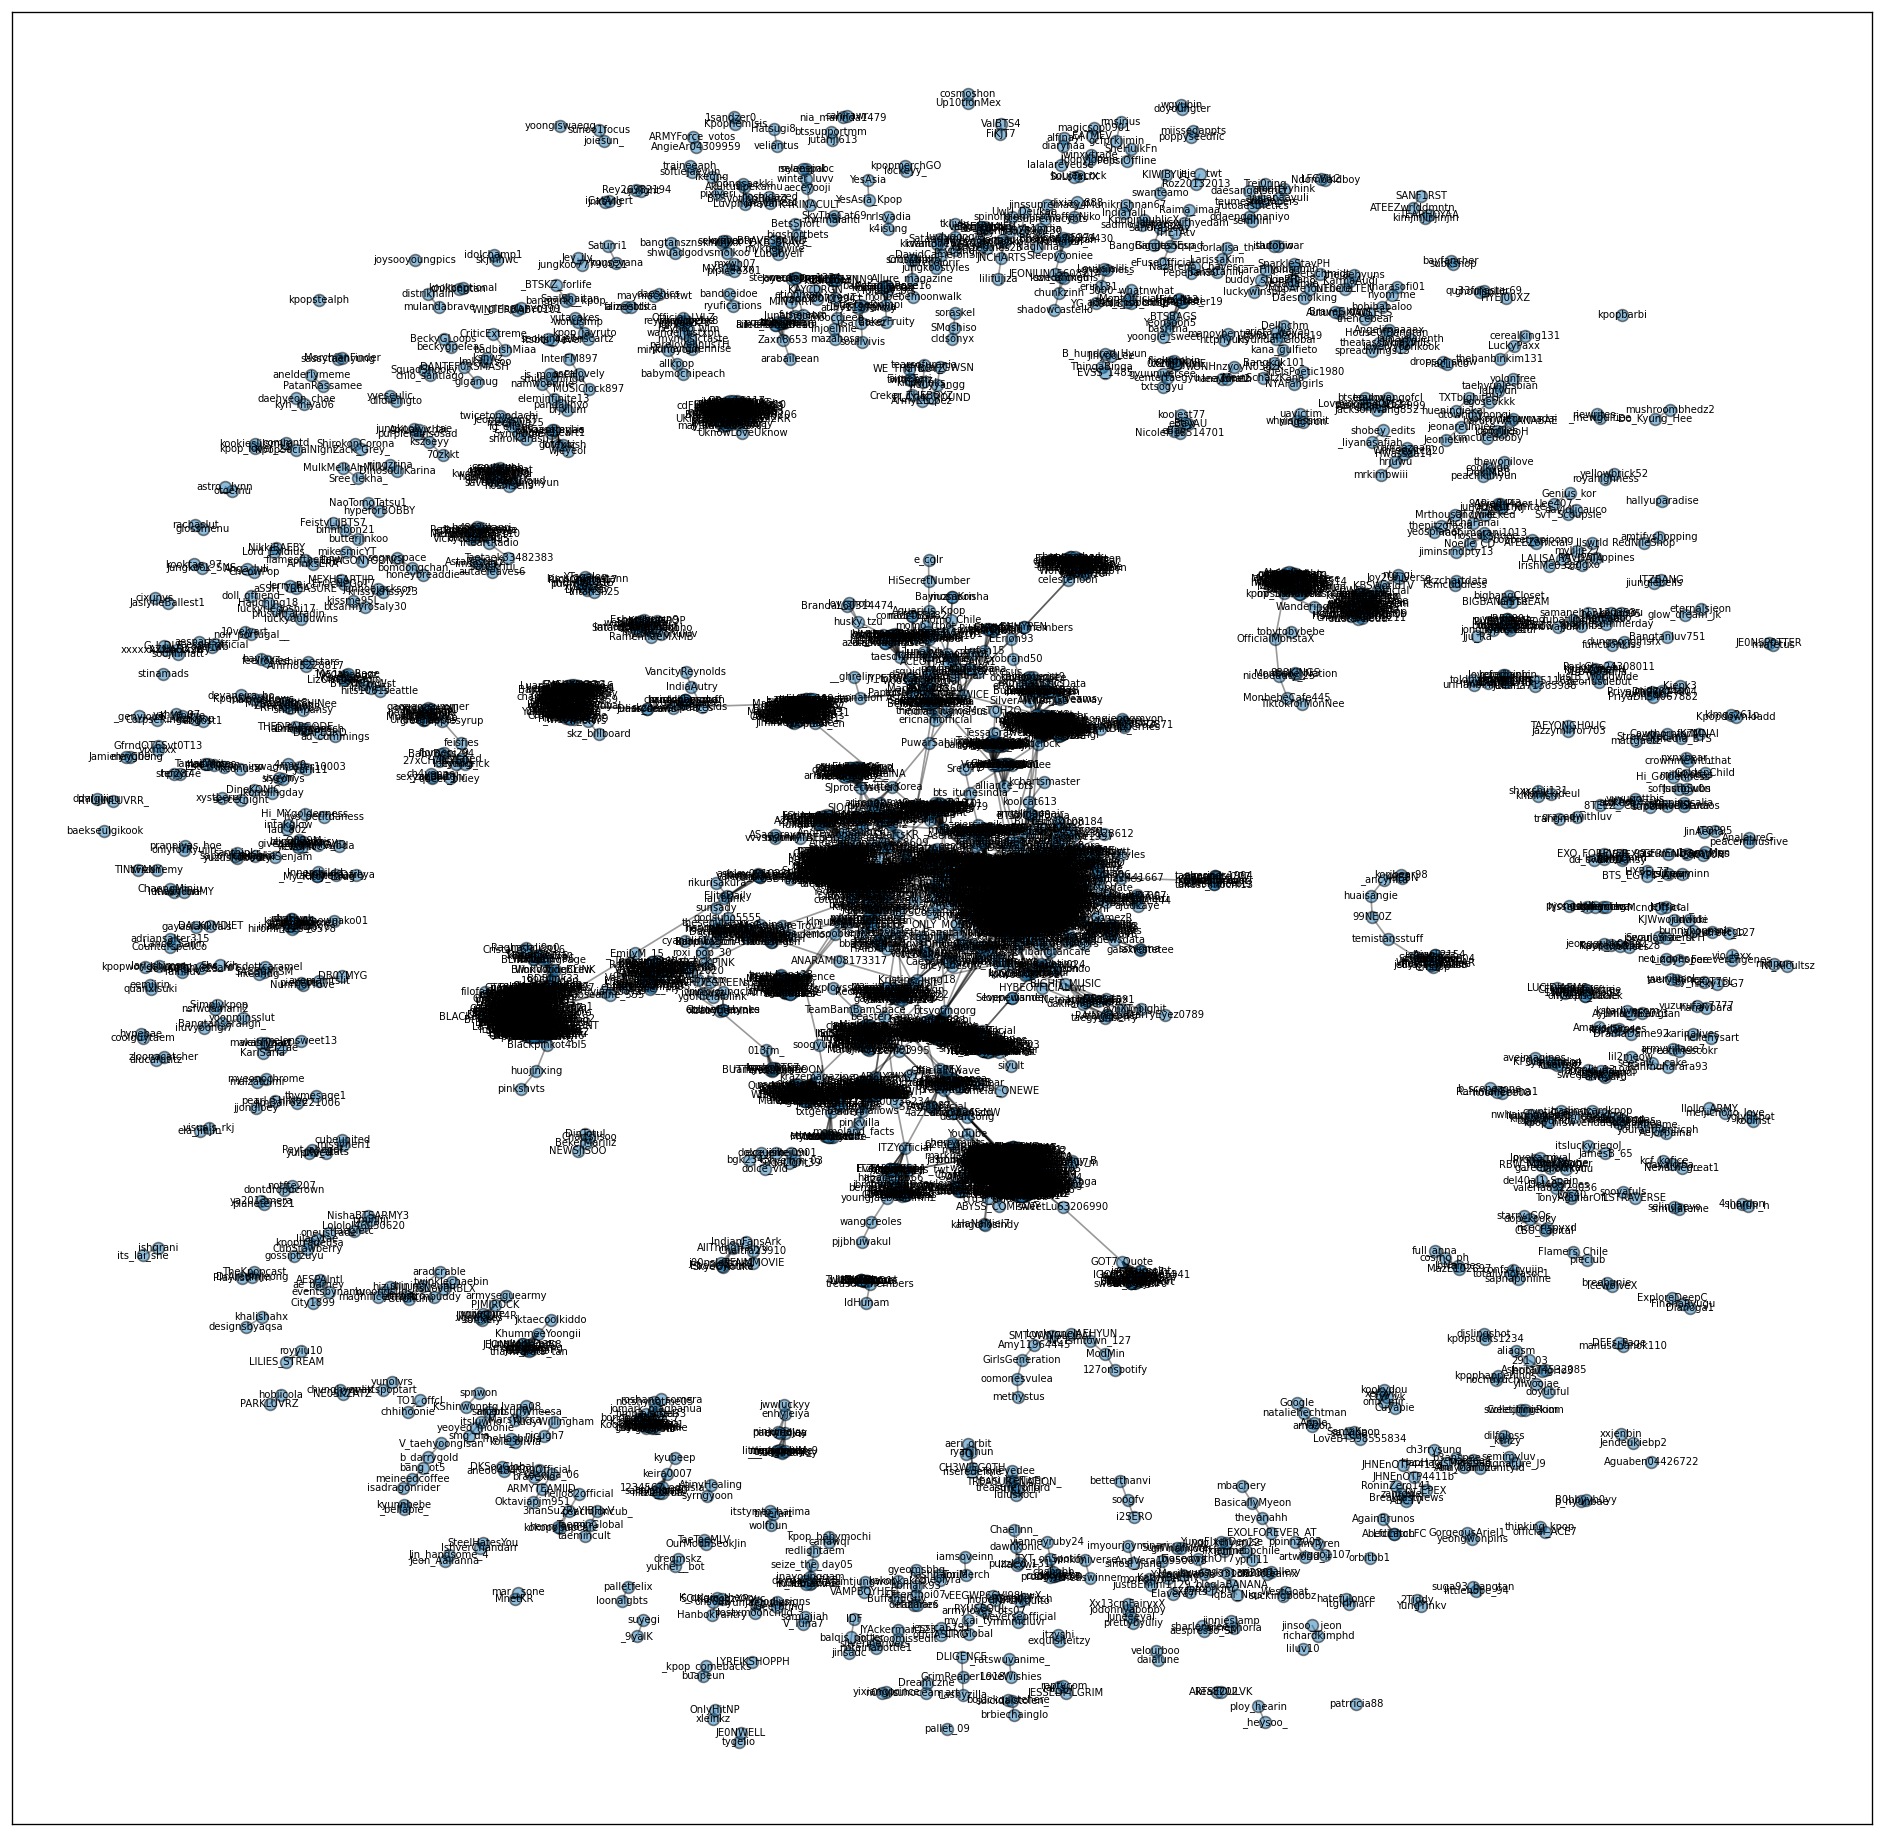

In [8]:
pos = nx.spring_layout(kpop_graph,iterations=50)
f, ax = plt.subplots(dpi=120, figsize=(20, 20))
nodes = nx.draw_networkx_nodes(kpop_graph, pos, alpha=0.5, node_size=50)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(kpop_graph, pos, font_size=6)
nx.draw_networkx_edges(kpop_graph, pos, width=1.0, alpha=0.4)

## Community Detection

In [9]:
partition = community_louvain.best_partition(kpop_graph)

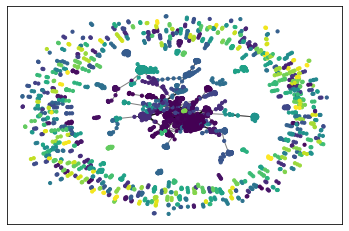

In [10]:
pos = nx.spring_layout(kpop_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(kpop_graph, pos, partition.keys(), node_size=10, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(kpop_graph, pos, alpha=0.5)
plt.show()

In [17]:
len(set(partition))

4125

## Pre-Processing

In [11]:
df = pd.read_excel("ALLKPOP_fix.xlsx")
df.head()

,Date,Username,Tweet,Mention
0,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,modooborahae
1,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,halsey
2,2021-06-16 04:16:59,ellieedward7,b'RT @modooborahae: .@halsey IG story: \xe2\x8...,BTS_twt
3,2021-06-16 04:16:58,ellieedward7,b'RT @bts_love_myself: Did you know you can ta...,bts_love_myself
4,2021-06-16 04:16:57,EdrielleJK,b'RT @KimNamjoon00_: -Kim SeokJin (2/7):\n\nJu...,KimNamjoon00_


In [12]:
def remove(tweet):
    tweet = tweet.replace('&lt;', ' ').replace('&gt;', ' ').replace('&amp;',' ').replace('&lrm;',' ')
    tweet = tweet.replace('&rsquo;',' ').replace('&lsquo;',' ').replace('&ldquo;',' ').replace('&rdquo;',' ')
    tweet = tweet.replace('&ndash;',' ').replace('&mdash;',' ').replace('&nbsp;',' ')
    
    # remove b'
    tweet = re.sub(r'b[\s]+', ' ', tweet)
    
    #remove mention
    tweet = re.sub('@[^\s]+', '', tweet)
    tweet = re.sub(r'\\[^\s]+', '', tweet)
    
    #remove link
    tweet = re.sub(r'http\S+', '', tweet)
    
    #remove hashtag / tagar
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    
    #remove RT 
    tweet = re.sub(r'RT[\s]+', '', tweet)
    
    # remove Non ASCII char
    tweet = re.sub(r'[^\x00-\x7f]', r'', tweet)
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', tweet)
    tweet = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", tweet)
    tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
    tweet = re.sub(r'\\n', '', tweet)
    
    #remove simbol dan karakter aneh
    tweet = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", tweet)
    
    #remove single char
    tweet = re.sub(r"\b[a-zA-Z]\b", "", tweet)
    
    #remove spasi
    tweet = re.sub(r'\s+',' ',tweet) 
    return tweet

In [13]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove(x))
df.head()

,Date,Username,Tweet,Mention
0,2021-06-16 04:16:59,ellieedward7,IG story is army,modooborahae
1,2021-06-16 04:16:59,ellieedward7,IG story is army,halsey
2,2021-06-16 04:16:59,ellieedward7,IG story is army,BTS_twt
3,2021-06-16 04:16:58,ellieedward7,Did you know you can take part in the LOVE MY...,bts_love_myself
4,2021-06-16 04:16:57,EdrielleJK,Kim SeokJin Daily Tweet for BTS JIN Brand Rep...,KimNamjoon00_


In [14]:
#case folding
df['Tweet'] = df['Tweet'].str.lower()
df.head()

,Date,Username,Tweet,Mention
0,2021-06-16 04:16:59,ellieedward7,ig story is army,modooborahae
1,2021-06-16 04:16:59,ellieedward7,ig story is army,halsey
2,2021-06-16 04:16:59,ellieedward7,ig story is army,BTS_twt
3,2021-06-16 04:16:58,ellieedward7,did you know you can take part in the love my...,bts_love_myself
4,2021-06-16 04:16:57,EdrielleJK,kim seokjin daily tweet for bts jin brand rep...,KimNamjoon00_


In [15]:
#dropduplicate
df['Tweet'] = df['Tweet'].drop_duplicates(keep='first')

#remove NaN value in column Tweet
df = df.dropna()
df

,Date,Username,Tweet,Mention
0,2021-06-16 04:16:59,ellieedward7,ig story is army,modooborahae
3,2021-06-16 04:16:58,ellieedward7,did you know you can take part in the love my...,bts_love_myself
4,2021-06-16 04:16:57,EdrielleJK,kim seokjin daily tweet for bts jin brand rep...,KimNamjoon00_
5,2021-06-16 04:16:57,kingtanPTW,our th of will be donated in the name,kpopidol_en
6,2021-06-16 04:16:57,prdsatk,albums on itunes the best,WORLDMUSICAWARD
...,...,...,...,...
6654,2021-06-10 12:55:24,Zaxn8653,so please stream park eun seok for aliee musi...,Zaxn8653
6655,2021-06-10 12:27:40,RinTakahashi10,please help to stream park eun seok to millio...,Zaxn8653
6662,2021-06-08 17:13:02,WestGoat,they making fun of bts,suckingboobz
6665,2021-06-08 16:52:13,puddinginhera,attention to park eun seok fans help to strea...,Zaxn8653


In [16]:
df.to_csv(r'data_kpop_preprocess.csv', index=False)

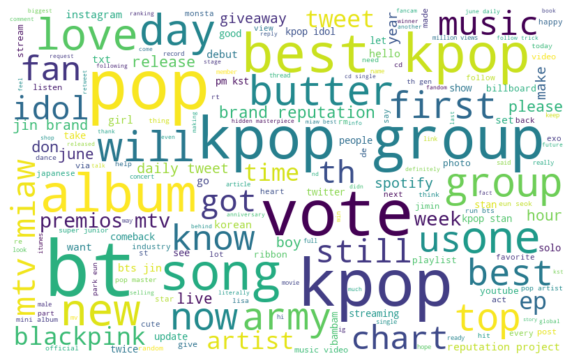

In [41]:
# Start with one review:
allwords = " ".join(review for review in df.Tweet)
stopwords = set(STOPWORDS)
# stopwords = nltk.corpus.stopwords.words('indonesian')

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=stopwords, background_color="white").generate(allwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
# Save the image in the img folder:
# wordcloud.to_file("img/wordcloudkpop.png")

In [43]:
top_N = 10
words = nltk.tokenize.word_tokenize(allwords)
word_dist = nltk.FreqDist(words)
# print(word_dist)

print('All frequencies word, INCLUDING STOPWORDS:')
print('=' * 60)
result = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(result)
print('=' * 60)

All frequencies word, INCLUDING STOPWORDS:
   Word  Frequency
0   the        446
1  kpop        263
2   for        262
3    to        252
4   and        200
5    of        198
6    on        176
7    is        173
8    in        172
9   bts        166


In [44]:
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

result = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
result

,Frequency
Word,
kpop,263
bts,166
pop,131
best,98
group,97
vote,87
album,66
like,57
music,49
